In [1]:
# Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Преобразуем csv файл в dataframe
data = pd.read_csv("housing.csv", delimiter=',')
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


## RМ: это среднее количество комнат на одно жилище
## LSTAT: это процент ниже статуса населения
## PTRATIO: Это соотношение учеников и учителей по городам
## MEDV: это средняя стоимость домов, занимаемых владельцами, в 1000 долларов

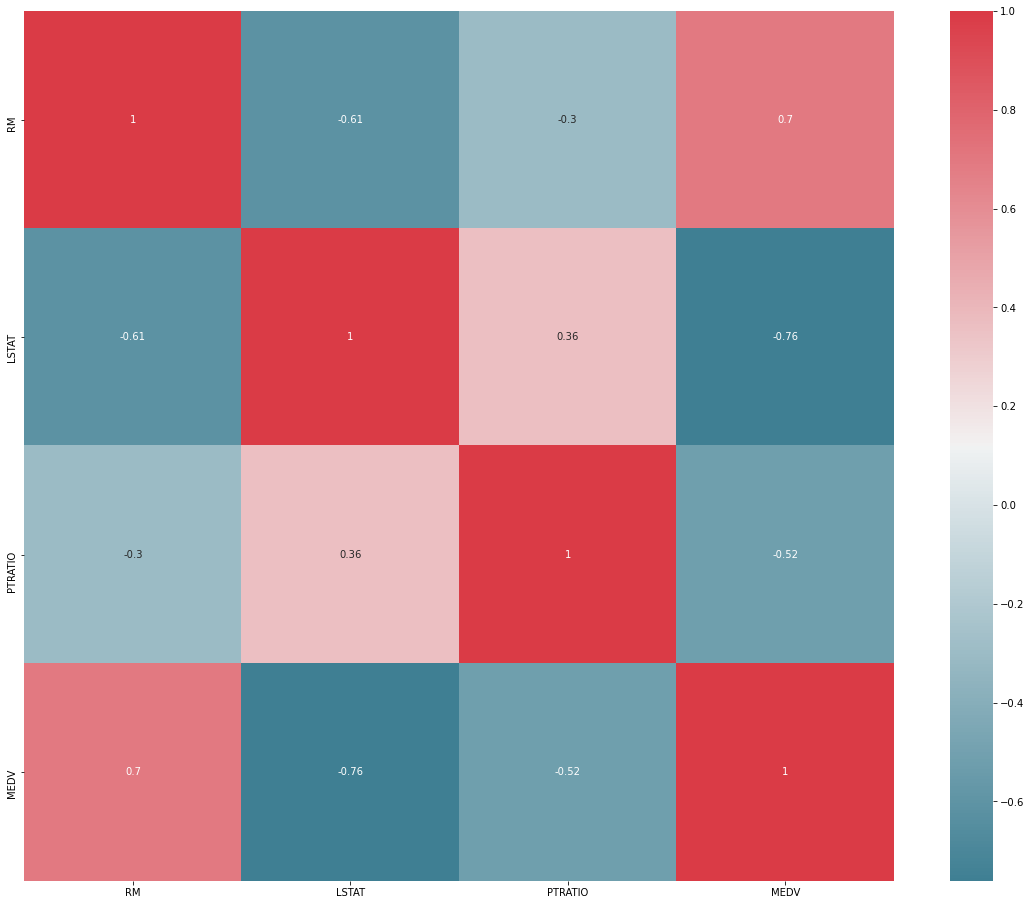

In [3]:
# Строим таблицу корреляции
f, ax = plt.subplots(figsize=(20, 16))
corr = data.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('correlation.png')

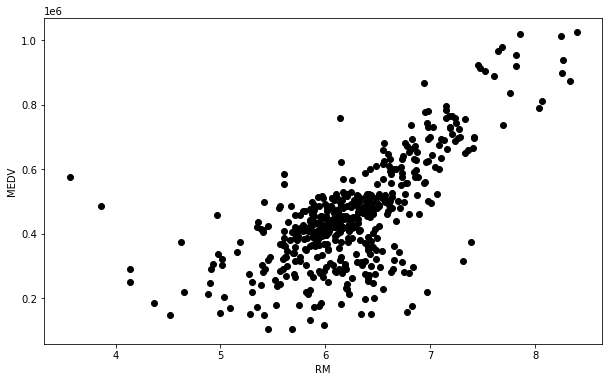

In [4]:
# Строим точечный график (1)
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = data['RM'], y = data['MEDV'], color="black")


plt.xlabel("RM")
plt.ylabel("MEDV")

plt.savefig('RM-MEDV.png')

plt.show()

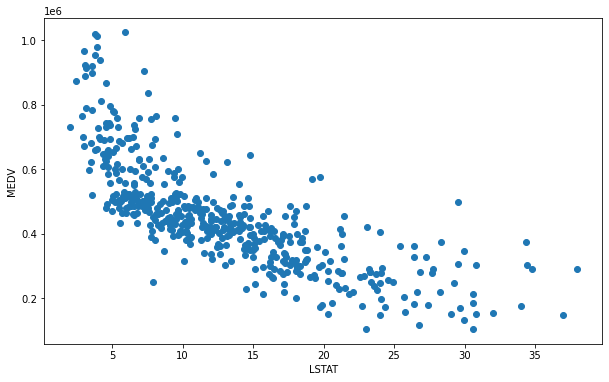

In [5]:
# Строим точечный график (2)
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = data['LSTAT'], y = data['MEDV'])

plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.savefig('LSTAT-MEDV.png')

plt.show()

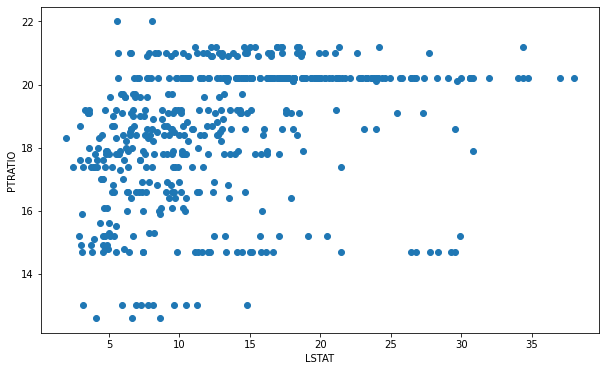

In [6]:
# Строим точечный график (3)
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = data['LSTAT'], y = data['PTRATIO'])

plt.xlabel("LSTAT")
plt.ylabel("PTRATIO")

plt.savefig('LSTAT-PTRATIO.png')

plt.show()

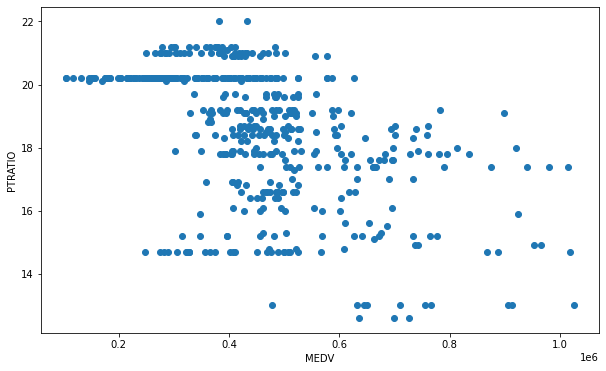

In [7]:
# Строим точечный график (4)
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = data['MEDV'], y = data['PTRATIO'])

plt.xlabel("MEDV")
plt.ylabel("PTRATIO")

plt.savefig('MEDV-PTRATIO.png')

plt.show()

In [8]:
# Удаляем столбец цен из dataframe и записываем его в отдельный массив
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [9]:
# Производим разделение данных
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

In [10]:
x_train

,RM,LSTAT,PTRATIO
325,5.869,9.80,20.2
140,6.174,24.16,21.2
433,6.749,17.44,20.2
416,6.436,16.22,20.2
487,6.794,6.48,21.0
...,...,...,...
106,5.836,18.66,20.9
270,7.820,3.76,14.9
348,6.112,12.67,20.2
435,6.297,17.27,20.2


In [11]:
x_test

,RM,LSTAT,PTRATIO
451,5.926,18.13,20.2
84,6.389,9.62,18.5
434,6.655,17.73,20.2
472,5.414,23.97,20.1
428,6.459,23.98,20.2
...,...,...,...
317,5.868,9.97,16.9
376,6.193,15.17,20.2
56,6.383,5.77,17.3
275,6.230,12.93,18.2


In [12]:
y_train

325    409500.0
140    294000.0
433    281400.0
416    300300.0
487    462000.0
         ...   
106    409500.0
270    953400.0
348    474600.0
435    338100.0
102    390600.0
Name: MEDV, Length: 391, dtype: float64

In [13]:
y_test

451    401100.0
84     501900.0
434    319200.0
472    147000.0
428    247800.0
         ...   
317    405300.0
376    289800.0
56     518700.0
275    422100.0
398    151200.0
Name: MEDV, Length: 98, dtype: float64

In [14]:
# Создаем модель линейной регрессии
model = LinearRegression()

In [15]:
# Обучаем модель 
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# Создаем предсказания
predictions = model.predict(x_test)

In [17]:
# Точность предсказаний
r2_score(y_test, predictions)

0.691093400309851

In [18]:
len(predictions), len(y_test)

(98, 98)

In [19]:
# Округление данных в массиве предсказаний 
predictions = [round(i, 1) for i in predictions]

In [20]:
a, b, razn = list(predictions), list(y_test), list()

In [21]:
# Вывод результатов
print('Предсказания - реальная цена - разница')
for i in range(len(a)):
    razn.append(round(abs(a[i] - b[i]), 1))
    print(f'{a[i]} - {b[i]} - {round(abs(a[i] - b[i]), 1)}')

Предсказания - реальная цена - разница
342593.8 - 401100.0 - 58506.2
506257.1 - 501900.0 - 4357.1
410499.9 - 319200.0 - 91299.9
237792.7 - 147000.0 - 90792.7
327005.8 - 247800.0 - 79205.8
403018.1 - 388500.0 - 14518.1
261060.4 - 266700.0 - 5639.6
701308.5 - 980700.0 - 279391.5
362924.7 - 367500.0 - 4575.3
585818.8 - 489300.0 - 96518.8
456966.2 - 396900.0 - 60066.2
365587.8 - 394800.0 - 29212.2
266036.4 - 268800.0 - 2763.6
265799.9 - 405300.0 - 139500.1
385359.3 - 279300.0 - 106059.3
525974.9 - 508200.0 - 17774.9
388922.4 - 264600.0 - 124322.4
365210.2 - 296100.0 - 69110.2
365315.4 - 228900.0 - 136415.4
420439.9 - 451500.0 - 31060.1
459794.5 - 445200.0 - 14594.5
461685.3 - 621600.0 - 159914.7
369745.8 - 359100.0 - 10645.8
644034.1 - 743400.0 - 99365.9
467828.3 - 420000.0 - 47828.3
473745.6 - 436800.0 - 36945.6
498572.6 - 357000.0 - 141572.6
634774.9 - 672000.0 - 37225.1
679806.3 - 743400.0 - 63593.7
168957.2 - 105000.0 - 63957.2
514819.1 - 556500.0 - 41680.9
239552.4 - 329700.0 - 90147.

In [22]:
# Преобразование list() в np.array()
razn = np.array(razn)
razn

array([ 58506.2,   4357.1,  91299.9,  90792.7,  79205.8,  14518.1,
         5639.6, 279391.5,   4575.3,  96518.8,  60066.2,  29212.2,
         2763.6, 139500.1, 106059.3,  17774.9, 124322.4,  69110.2,
       136415.4,  31060.1,  14594.5, 159914.7,  10645.8,  99365.9,
        47828.3,  36945.6, 141572.6,  37225.1,  63593.7,  63957.2,
        41680.9,  90147.6,  20285.5,  42676.4,  30050.2,  10846.5,
       129616.9, 101179.9,   2564.1,  92745.1,  67275.2,  98013.8,
        75672.5,  47381.4,  26852.6,  77026.9,  69710.3,  27442.5,
        58296.2,   8892.8,  49393.8,  62400.3,  55278.4,  88294.3,
       174043. ,  29182.2,  59672.3,   7727.4,  47447.8,  97764.7,
         4828.8,  60360. ,   8086.5,  46603.7,  12110. , 210295.9,
        56231.9,  25008.7, 127467.6, 139907.3,  91264.9,  10388.9,
        63991.6,  11286. ,  64540.8,  36644. ,  41759. ,  41587.8,
         1002.3,   8941.4,  27971.8, 109461.9, 207350.8, 130554.6,
        77227.6,  64476.4,  33312.3,  51220.1,  69543.5,   379

In [23]:
# Медианное значение разниц предсказаний от реальной стоимости
np.median(razn)

57264.05